# Data Preparation

Pada bagian ini kita akan melakukan proses pra pengolahan data. Beberapa hal yang biasanya dilakukan adalah,

1. Load data
2. Cek _missing value_
3. Impute _missing value_ jika diperlukan
4. Cek data kategorikal / numerikal
5. Manipulasi kolom (jika diperlukan)

In [1]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd

In [2]:
# Load data

df = pd.read_csv('data/home_data.csv')

# Display 5 data teratas
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
# Cek dimensi data -> Jumlah baris dan kolom
print(f'Dimensi: {df.shape}')
print(f'Jumlah Baris: {df.shape[0]}')
print(f'Jumlah Kolom: {df.shape[1]}')

Dimensi: (21613, 21)
Jumlah Baris: 21613
Jumlah Kolom: 21


In [4]:
# Cek nama-nama kolom yang ada didalam data
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Cek informasi umum tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Cek nilai statistik deskriptif
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
# Cek jumlah data pada kolom dengan nilai kosong / NA
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
from datetime import datetime

# Manipulasi kolom -> date
df["date_converted"] = pd.to_datetime(df["date"]) # waktu pencatatan data

# Buat kolom baru untuk umur rumah
current_year = datetime.now().year
df["age_of_house"] = current_year - pd.to_datetime(df["date"]).dt.year


df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

   date_converted  age_of_house  
0      2014-10-13             8  
1      2014-12-09             8  
2      2015-02-25             7  
3      2014-12-09             8  
4      2015-02-18             7  

[5 rows x 23 columns]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'age_of_house'}>]], dtype=object)

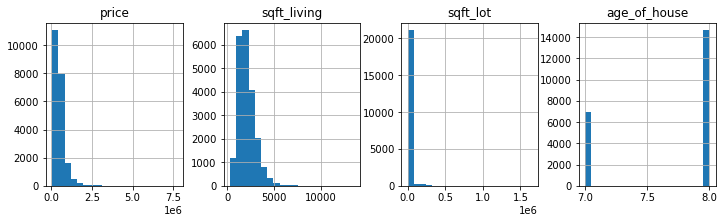

In [9]:
# Visualisasi Distrubusi Harga Rumah, Luas Bangunan, dan Luas Tanah, dan Usia Bangunan
# Misal kita tertarik untuk lebih lanjut mengetahui sebaran datanya

# Plot Histogram
df.hist(column=["price", "sqft_living", "sqft_lot", "age_of_house"], bins=20, figsize=(12,3), layout=(1,4))

<AxesSubplot:>

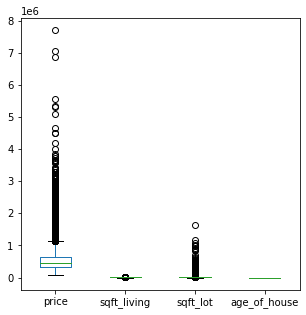

In [10]:
# Plot Boxplot
# Dapat membantu kita untuk menjukkan nilai nilai yang outlier
df.boxplot(column=["price", "sqft_living", "sqft_lot", "age_of_house"], grid=False, figsize=(5,5))

<AxesSubplot:>

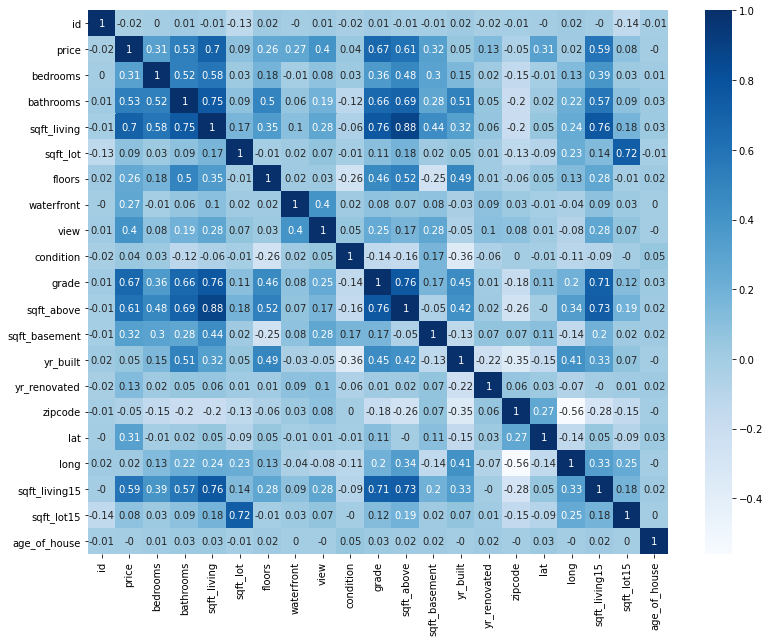

In [11]:
# Cek korelasi antar variabel
# Pada konteks regresi, hal ini sangat sensitif terhadap hasil prediksi. 
# Idealnya, hubungan yang kuat harus terjadi antara independen variabel dengan dependen variabel.
# Hubungan yang kuat antar indenpen variabel dapat menjadi masalah --> MULTICOLINEARITY

import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr().round(2)
plt.figure(figsize=(13,10))
sns.heatmap(corr, annot = True, cmap = 'Blues')

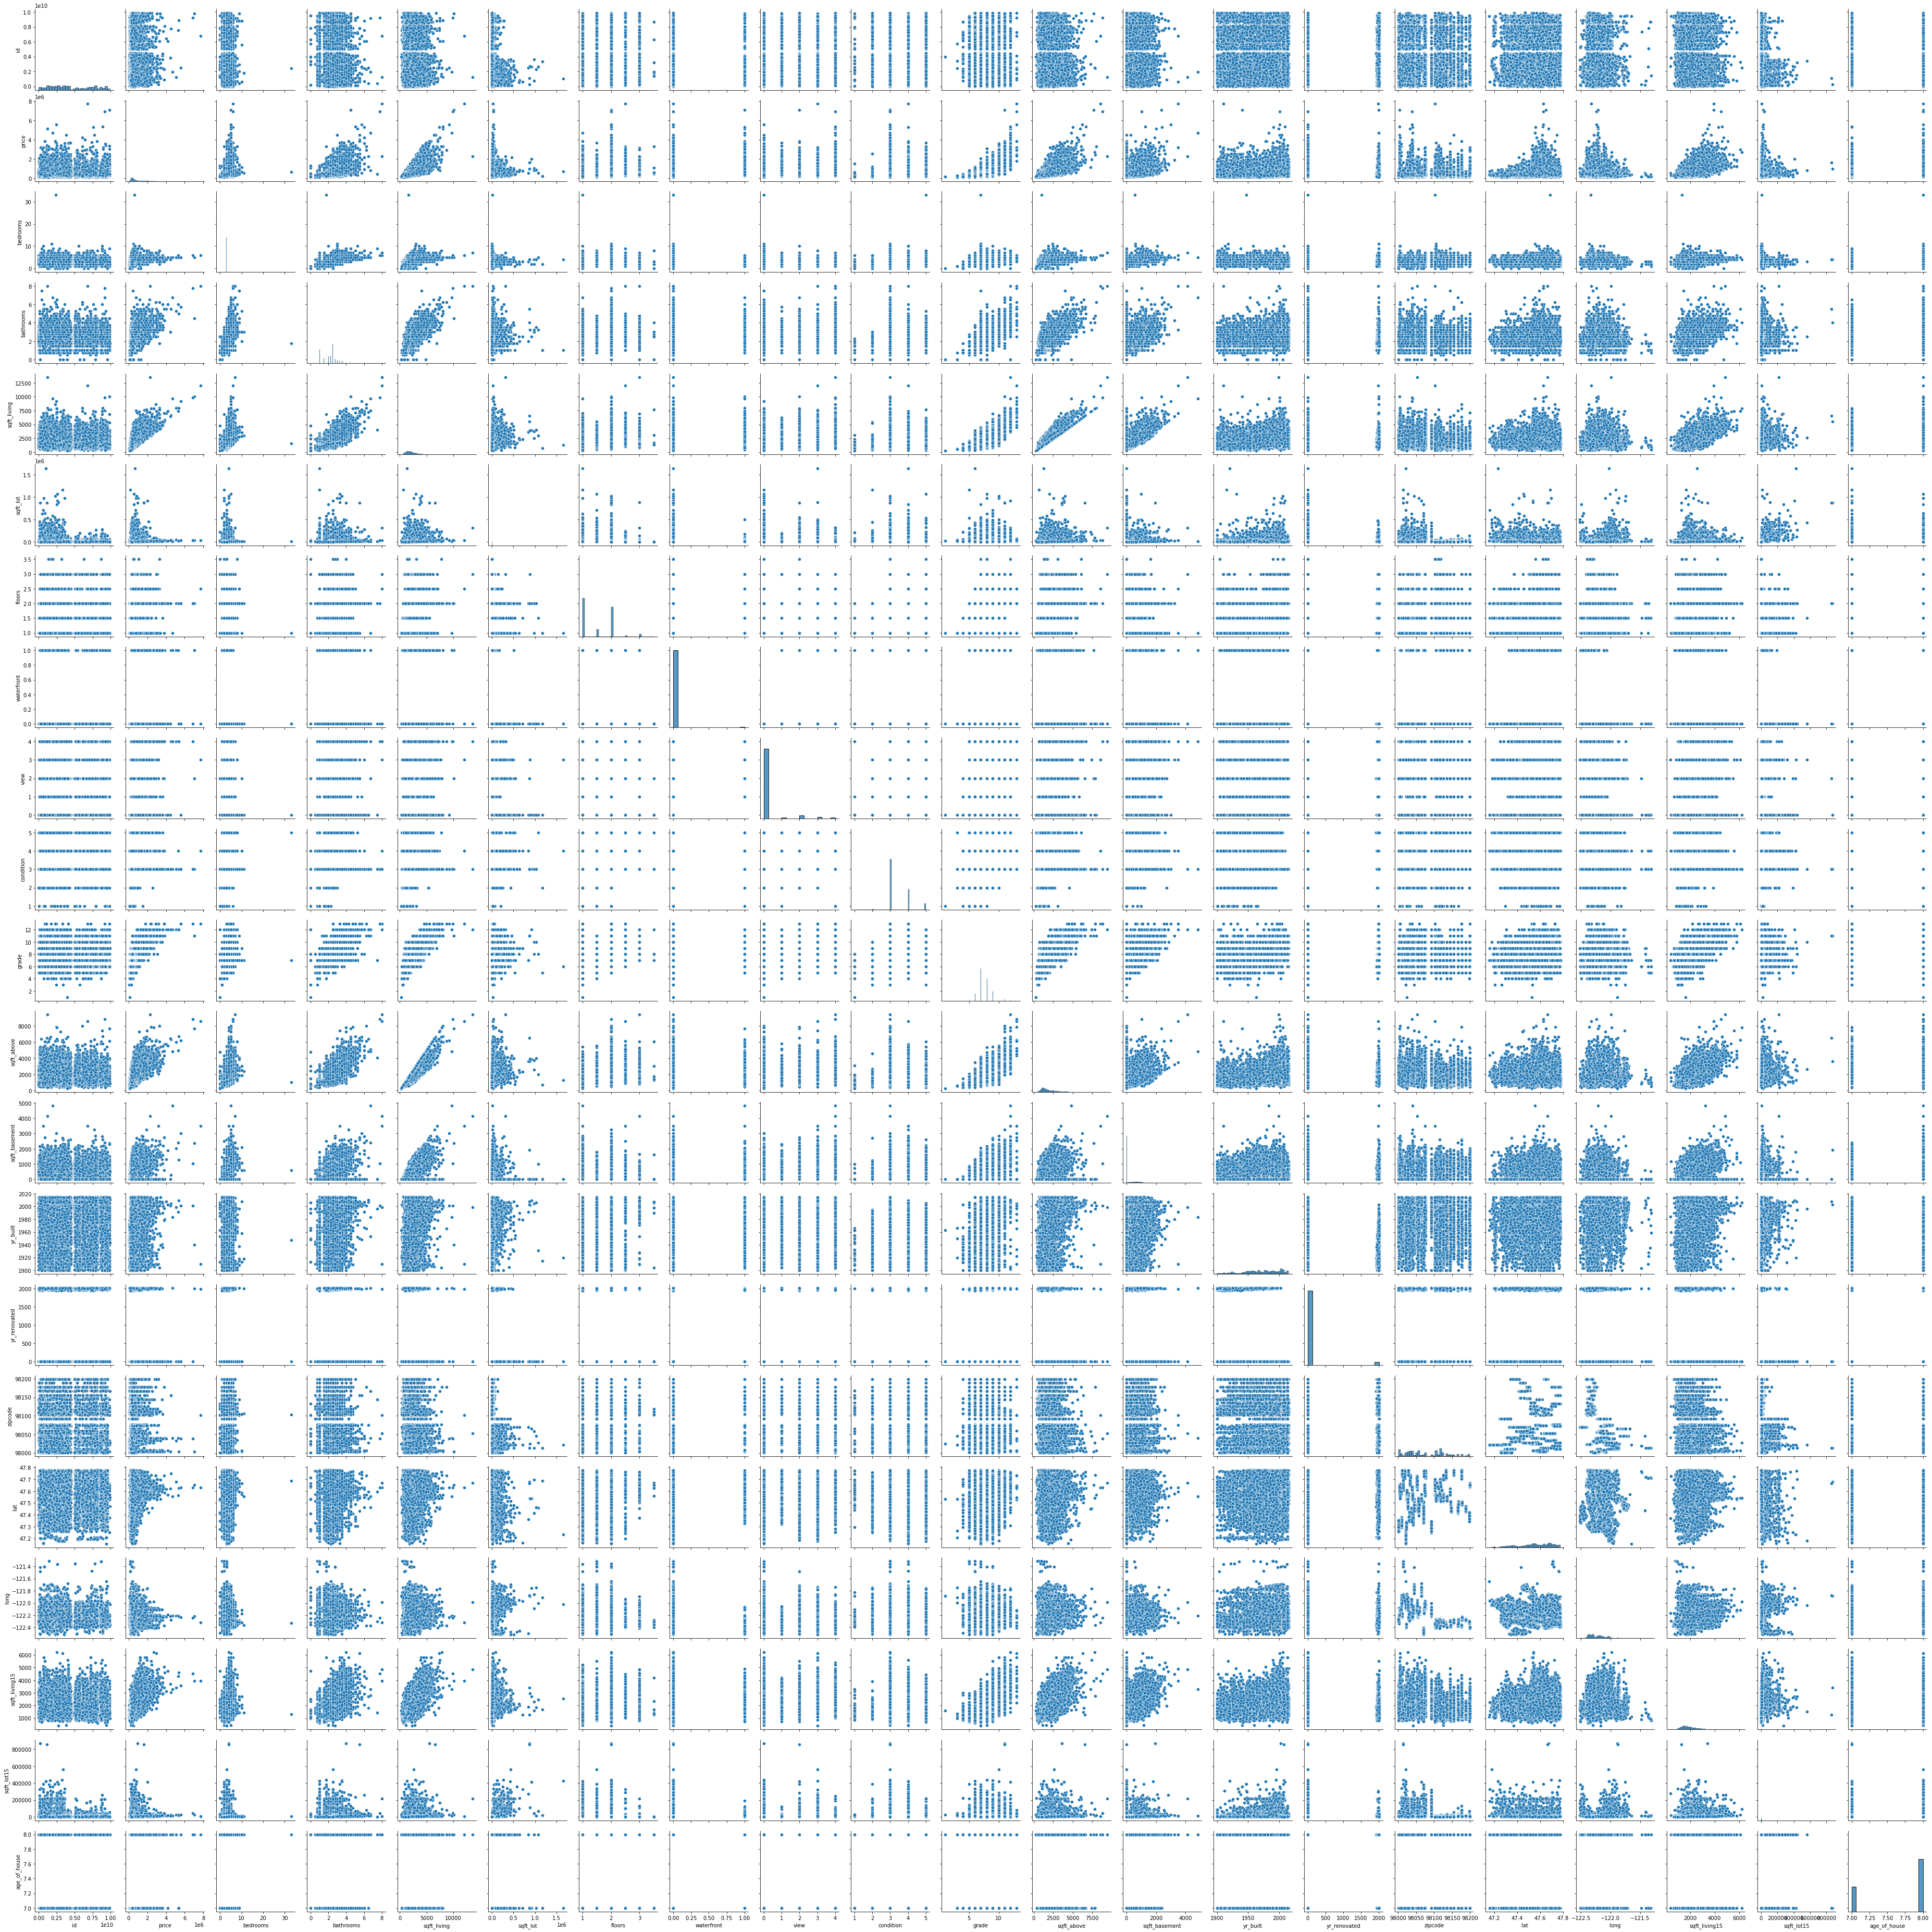

In [57]:
# Cek hubungan antara Dependent Variabel (Target) dengan Independent Variabel (Fitur)
# dengan menggunakan scatter plot
# Target = Price
# Fitur = variabel-variabel yang lain

sns.pairplot(df)

In [12]:
# Cukup sulit mendapatkan informasi jika kita melakukan scatter plotting untuk semua kolom
# Maka, nilai korelasi akan sangat membantu kita dalam mengetahui hubungan antara target-fitur, fitur-fitur
# Sebagai contoh, kita cek saja hubungan antara price dengan fitur yang memiliki nilai korelasi > 0.5

# Cek Nilai Korelasi
high_corr = corr["price"]
print(high_corr)

id              -0.02
price            1.00
bedrooms         0.31
bathrooms        0.53
sqft_living      0.70
sqft_lot         0.09
floors           0.26
waterfront       0.27
view             0.40
condition        0.04
grade            0.67
sqft_above       0.61
sqft_basement    0.32
yr_built         0.05
yr_renovated     0.13
zipcode         -0.05
lat              0.31
long             0.02
sqft_living15    0.59
sqft_lot15       0.08
age_of_house    -0.00
Name: price, dtype: float64


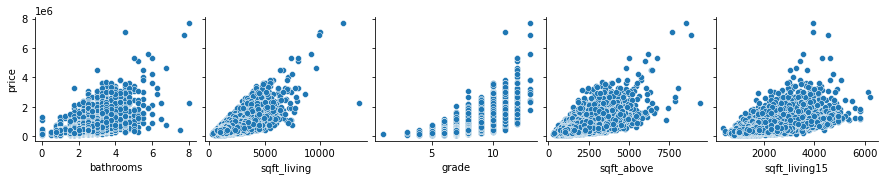

In [16]:
# Plot Korekasi > 0.5
hi_corr_features = df[["bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]]
target = df[["price"]]

sns.pairplot(df,x_vars=hi_corr_features,y_vars=target)

# Feature Selection

Berdasarkan tahap sebelumnya, kita mengetahui hanya ada beberapa fitur / independend variabel yang berpengaruh terhadap target (dependend variabel). Oleh karena itu, kita hanya akan menggunakan data tersebut.

In [17]:
# Pilih fitur dengan korelasi > 0.5

X = df[["bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]] # fitur
y = df[["price"]] # target

## Split data

Untuk kebutuhan pembuatan model (machine learning). Kita akan split data menjadi data training dan data testing

In [20]:
# import package
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split data menjadi 70% training dan 30% testing

# Model

Kasus yang akan kita pecahkan adalah bagaimana cara menentukan harga rumah dengan kualifiasi tertentu. Target merupakan nilai riil dari harga rumah. Sehingga, kita dapat menggunakan model regresi untuk memprediksi harga rumah. Salah satu model regresi paling sederhana untuk memecahkan masalah ini adalah __Regresi Linier__

In [21]:
# import package
from sklearn.linear_model import LinearRegression

# Inisiasi obyek model
lr = LinearRegression()

# Latih model dengan data training (fitting)
lr.fit(X_train, y_train)

# Prediksi harga dengan data testing
y_pred = lr.predict(X_test)

# Evaluasi

Untuk mengetahui performa model yang kita buat, maka kita perlu melakukan evaluasi terdapa model tersebut. Pada kasus regresi, jika hasil prediksi jaraknya semakin jauh dengan nilai sebenernya, maka hasil model kita kurang baik. Pengukuran evaluasi pada model regresi diantaranya dapat menggunakan nilai $R^2$, __Mean Squared Error (MSE)__, __Mean Absolute Error (MAE)__, atau __Root Mean Square Error (RMSE)__.

In [23]:
# import package
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score = r2_score(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
mse_score = mean_squared_error(y_test, y_pred)
rmse_score = mean_squared_error(y_test, y_pred, squared=True) # RMSE diaktifkan dengan parameter squared=True

print(f'Skor R2: {r2_score}')
print(f'Skor MAE: {mae_score}')
print(f'Skor MSE: {mse_score}')
print(f'Skor RMSE: {rmse_score}')

Skor R2: 0.5380086697957824
Skor MAE: 165013.81377393997
Skor MSE: 66696087086.00337
Skor RMSE: 66696087086.00337


In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_converted',
       'age_of_house'],
      dtype='object')

## Hasil Evaluasi

Ternyata hasilnya tidak cukup oke. Terbukti dari nilai $R^2$ yang berada pada angka 0.53. Jika model yang kita buat baik, maka nilai $R^2$ akan mendekati 1. Mari kita coba menggunakan semua fitur kecuali id, tanggal-tanggal, lat, long, dan zipcode 

## Buat Model Ulang

In [28]:
# Drop kolom
df.drop(columns = ['id','date', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'date_converted'], axis = 1, inplace = True)

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  221900         3       1.00         1180      5650     1.0     0   
1  538000         3       2.25         2570      7242     2.0     0   
2  180000         2       1.00          770     10000     1.0     0   
3  604000         4       3.00         1960      5000     1.0     0   
4  510000         3       2.00         1680      8080     1.0     0   

   condition  grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0          3      7        1180              0           1340        5650   
1          3      7        2170            400           1690        7639   
2          3      6         770              0           2720        8062   
3          5      7        1050            910           1360        5000   
4          3      8        1680              0           1800        7503   

   age_of_house  
0             8  
1             8  
2             7  
3             8  
4             7

In [35]:
# Pisahkan fitur dan target
# Kali ini kita akan menggunakan iloc

X2 = df.iloc[:,1:] # semua baris, kolom dari indesk ke-1 hingga semua
y2 = df.iloc[:,0] # semua baris, kolom indeks ke-0

In [36]:
# Split training dan testing

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [37]:
# Inisiasi obyek model
lr2 = LinearRegression()

# Latih model dengan data training (fitting)
lr2.fit(X2_train, y2_train)

# Prediksi harga dengan data testing
y2_pred = lr2.predict(X2_test)

In [39]:
# Evaluasi model baru
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score2 = r2_score(y2_test, y2_pred)
mae_score2 = mean_absolute_error(y2_test, y2_pred)
mse_score2 = mean_squared_error(y2_test, y2_pred)
rmse_score2 = mean_squared_error(y2_test, y2_pred, squared=True) # RMSE diaktifkan dengan parameter squared=True

print(f'Skor R2: {r2_score2}')
print(f'Skor MAE: {mae_score2}')
print(f'Skor MSE: {mse_score2}')
print(f'Skor RMSE: {rmse_score2}')

Skor R2: 0.5887527596821922
Skor MAE: 156294.31865100577
Skor MSE: 59370338707.41818
Skor RMSE: 59370338707.41818


## Evaluasi Ulang

Ternyata terjadi peningkatan pada metric $R^2$ mesikpun tidak signifikan, yaitu menjadi 0.58. Proses seperti ini akan terus belanjut hingga kita mendapatkan model yang sesuai dengan harapan.